Found 27072 images belonging to 16 classes.


C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


423/423 ━━━━━━━━━━━━━━━━━━━━ 117s 275ms/step


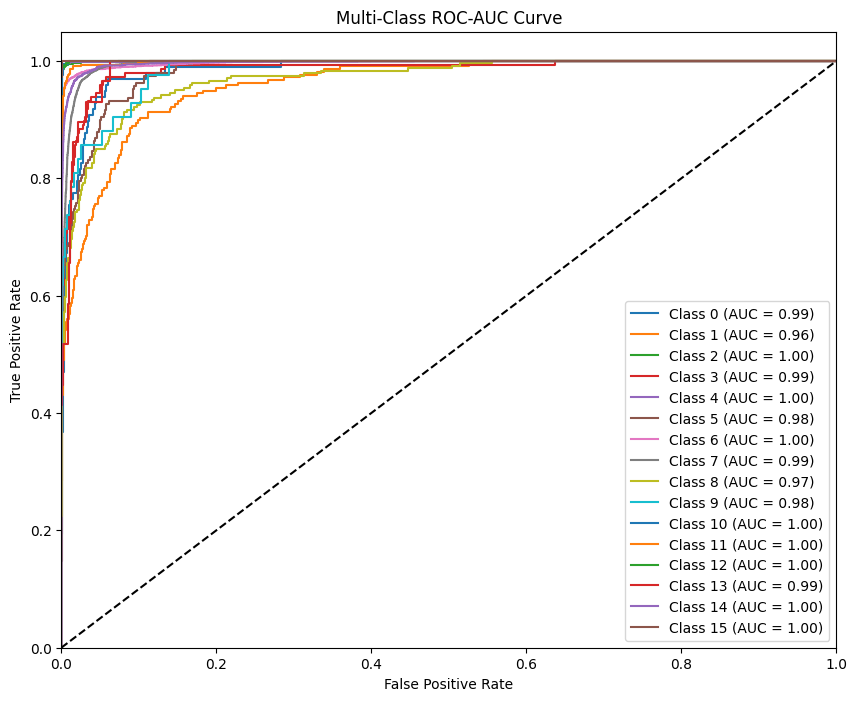

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import label_binarize

# Load the saved Keras model
model = load_model("alexnet_model.keras")

# Set up the ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "fish_image",
    target_size=(227, 227),  # Ensure this matches the model's expected input size
    batch_size=64,
    class_mode='categorical',  # Use categorical for multi-class labels
    shuffle=False
)

# Get predictions and ground truth labels
all_labels = test_generator.classes
all_preds = model.predict(test_generator)

# Binarize the labels for multi-class ROC-AUC computation
n_classes = all_preds.shape[1]
all_labels = label_binarize(all_labels, classes=np.arange(n_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels[:, i], all_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8779 - loss: 0.4262 - val_accuracy: 0.9558 - val_loss: 0.1458
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9635 - loss: 0.1211 - val_accuracy: 0.9713 - val_loss: 0.0995
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9759 - loss: 0.0798 - val_accuracy: 0.9757 - val_loss: 0.0833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9840 - loss: 0.0546 - val_accuracy: 0.9749 - val_loss: 0.0782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0421 - val_accuracy: 0.9775 - val_loss: 0.0781
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9903 - loss: 0.0339 - val_accuracy: 0.9765 - val_loss: 0.0794
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9908 - loss: 0.0299 - val_accuracy: 0.9780 - val_loss: 0.0752
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9940 - loss: 0.0202 - 

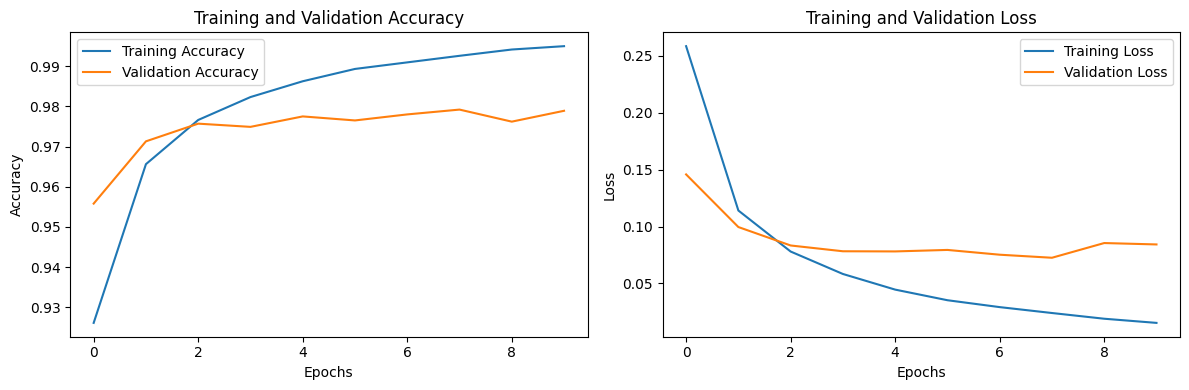

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved Keras model
model = tf.keras.models.load_model("alexnet_model.keras")

# Load dataset (example using MNIST dataset)
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()

# Preprocess the data: normalize and reshape
X_train = X_train / 255.0
X_val = X_val / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

# Create a simple model (for example purposes)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history object
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Plot accuracy and validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()